In [323]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from matplotlib.ticker import FixedLocator
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import matplotlib.gridspec as gridspec
plt.ion()
plt.show()

Implementation for algorithm described in : http://www.naun.org/main/NAUN/computers/20-713.pdf

In [320]:
P = 'HPHPPHHPHPPHPHHPPHPH'
print(len(P))
# TO DO create random generator for input population
P = list(P) # transform input string into array
print('input: ', P)

pi = 'RUULDLULLDRDRDLDRRU'
pi = list(pi)
print(len(pi))
print('output: ', pi)

20
input:  ['H', 'P', 'H', 'P', 'P', 'H', 'H', 'P', 'H', 'P', 'P', 'H', 'P', 'H', 'H', 'P', 'P', 'H', 'P', 'H']
19
output:  ['R', 'U', 'U', 'L', 'D', 'L', 'U', 'L', 'L', 'D', 'R', 'D', 'R', 'D', 'L', 'D', 'R', 'R', 'U']


Utility methods for visualisation of policies:

In [336]:
def updateCurrentIndex(x, y, action):
    if action == 'U':
        x = x + 1
    elif action == 'D':
        x = x - 1
    elif action == 'R':
        y = y + 1
    else:
        y = y - 1
    return x, y

def getActionValue(prot_type):
    return 1 if prot_type == 'H' else -1

"""
Generates a matrix representing the 2D model of the protein based on the sequence of actions pi
"""
def getVisualizationMatrix(P, pi):
    l = 2* len(pi)
    viz = np.zeros([l+1, l+1]) # visualization matrix initialized with 0
    lines = [] # this will hold the order of points
    cur_x, cur_y = len(pi), len(pi)
    lines.append((cur_x, cur_y))
    viz [cur_x, cur_y] = getActionValue(P[0]) # initialize center of the matrix
    for  action, prot_type in zip(pi, P[1:]):   
        cur_x, cur_y = updateCurrentIndex(cur_x, cur_y, action)
        viz [cur_x, cur_y] = getActionValue(prot_type)
        lines.append((cur_x, cur_y))
        
    return viz, lines


viz, lines =getVisualizationMatrix(P, pi)
print(lines)


[(19, 19), (19, 20), (20, 20), (21, 20), (21, 19), (20, 19), (20, 18), (21, 18), (21, 17), (21, 16), (20, 16), (20, 17), (19, 17), (19, 18), (18, 18), (18, 17), (17, 17), (17, 18), (17, 19), (18, 19)]


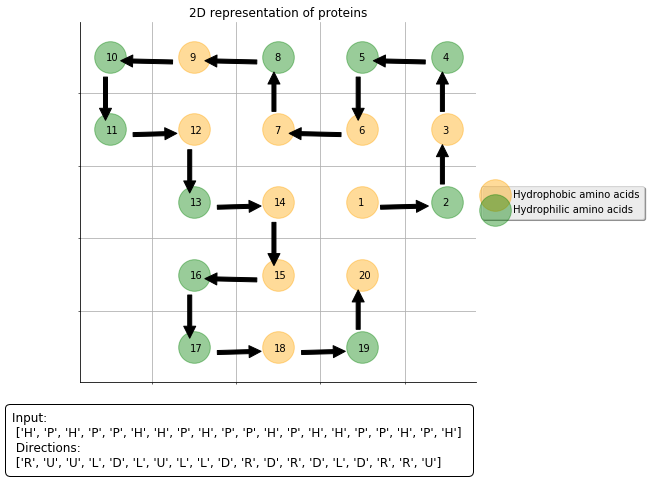

In [379]:
"""
This method generates an annotated graph representation for the input string of hydrophobic / polar aminacids 
and the policy pi of actions to be taken at each step
"""

def plotSolution(P, pi):
    viz, lines = getVisualizationMatrix(P, pi)
    
    fig = plt.figure(figsize=(7, 7))
    # Split graphic into 2 sections for the 2d map and the input viz
    gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[5,1]) 
    
    # Section1 : 2D map
    ax = plt.subplot(gs[0]) # use first grid spec

    y, x = np.where(viz == 1) # hydrophobic AA
    plt.scatter(x, y, s=1000, c='orange', alpha=0.4)

    y, x = np.where(viz == -1) # hydrophilic AA
    plt.scatter(x, y, s=1000, c='green', alpha=0.4 )
    
    plt.legend(['Hydrophobic amino acids', 'Hydrophilic amino acids '], loc='center left', bbox_to_anchor=(1, 0.5),
               fancybox=True, shadow=True)

    offset = 0.05 # this is used to center the text
    # Write numbers on circles
    for i, point in enumerate(lines):
        if i + 1 == len(lines):
            ax.annotate(i + 1, xy=(point[1]- offset, point[0]- offset))
            break
        nextPoint = lines[i+1]
        ax.annotate(i + 1, 
                    xytext=(point[1] - offset, point[0] - offset),
                    xy=(nextPoint[1] - offset, nextPoint[0] - offset),
                    arrowprops=dict(facecolor='black', shrink=0.18),

                   )



    plt.xticks([], [])
    plt.yticks([], [])
    grid_indexes = np.arange(viz.shape[0])
    grid_indexes = grid_indexes + 0.5
    minor_locator = FixedLocator(grid_indexes)
    ax.xaxis.set_minor_locator(minor_locator)


    grid_indexes = np.arange(viz.shape[1])
    grid_indexes = grid_indexes + 0.5
    minor_locator = FixedLocator(grid_indexes)
    ax.yaxis.set_minor_locator(minor_locator)




    plt.grid(which='minor')
    sns.despine()
    plt.title('2D representation of proteins')

    # Section2 : input/ policy annotation
    ax = plt.subplot(gs[1])

    at = AnchoredText("Input: \n %s \n Directions: \n %s" % (P, pi),
                      prop=dict(size=12), frameon=True,
                      loc=1,
                      )
    at.patch.set_boxstyle("round,pad=0.2,rounding_size=0.4")
    ax.add_artist(at)

    plt.axis('off');
    plt.tight_layout()
    
# plotSolution(P, pi)

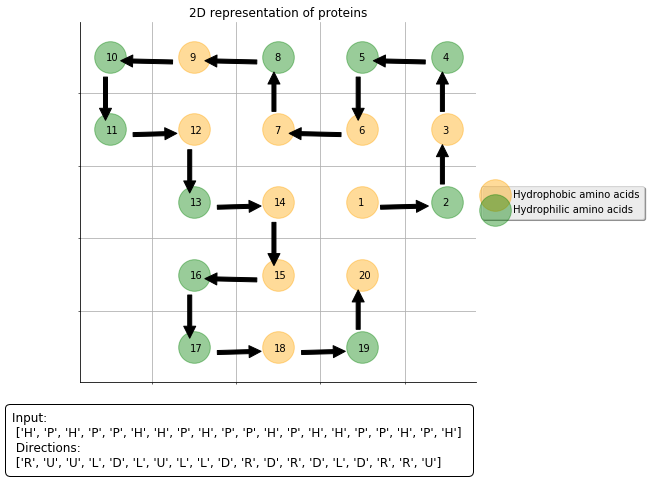

In [380]:
plotSolution(P, pi)